**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

**Read the Dataset**

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **EDA**

In [6]:
print(df.isnull().sum())
print(df.shape)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
(284807, 31)


In [7]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

print("Fraudulent Transaction : ",len(fraud))
print("Valid Transaction : ",len(valid))

Fraudulent Transaction :  492
Valid Transaction :  284315


In [8]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

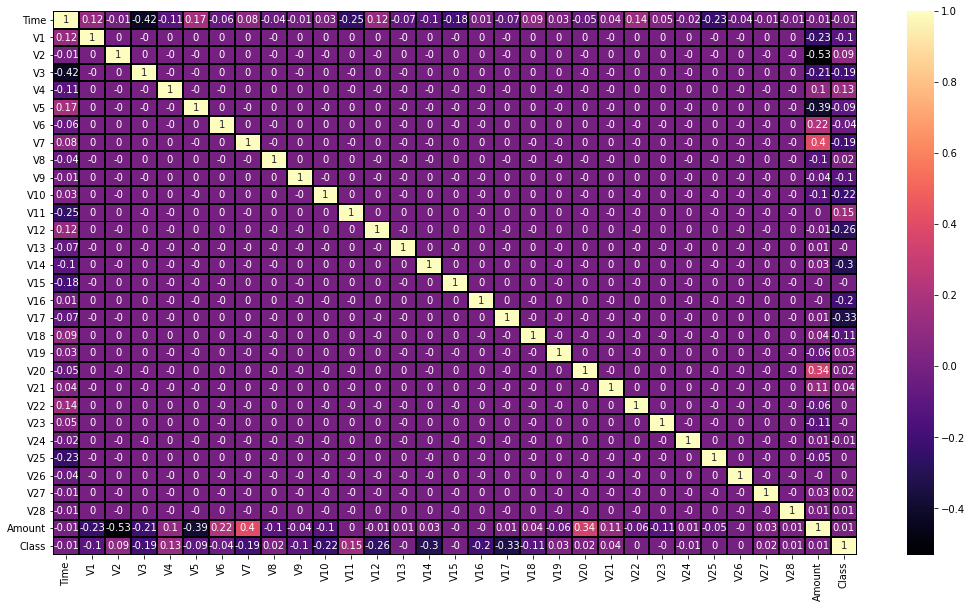

In [10]:
nwdf = df.corr().round(2)
fig = plt.figure(figsize=(18,10))
sns.heatmap(nwdf,linewidths= 1, linecolor= 'black' , cmap = plt.cm.magma, annot = True)

**Select the Feature Columns**

In [11]:
X = df.drop('Class', axis = 1)
X[0:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


**Select the Target Column**

In [12]:
y = df['Class']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

**Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.2, random_state = 4)
print("Train Size : ",X_train.shape,y_train.shape)
print("Test Size : ",X_test.shape,y_test.shape)

Train Size :  (227845, 30) (227845,)
Test Size :  (56962, 30) (56962,)


### **K-NEAREST NEIGHBOR**

In [14]:
#CHECK WHICH VALUE OF K IS SUITABLE FOR THE CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
K = 10
ovr_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh.fit(X_train,y_train)
    #Predict Model  
    yhat = neigh.predict(X_test)
    ovr_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(ovr_acc)

[0.99796355 0.99831467 0.99827955 0.99833222 0.99834978 0.99829711
 0.99829711 0.99824444 0.99824444]


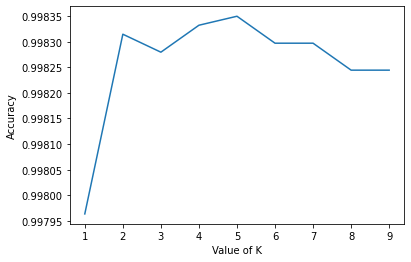

The best accuracy is 0.9983497770443454 comes with the value of K  = 5


In [15]:
plt.plot(range(1,K),ovr_acc)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

print(f"The best accuracy is {ovr_acc[4]} comes with the value of K  = {'5'}")

In [16]:
#BUILD MODEL AND TRAIN THE CLASSIFIER
K = 5
knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
#PREDICTION
y_hat = knn.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

[0 0 0 0 0]
135406    0
137826    0
70830     0
194993    0
87575     0
Name: Class, dtype: int64


Accuracy score : 0.99835

F1 Score : 0.12963

Precision score : 1.00000

Recall score : 0.06931


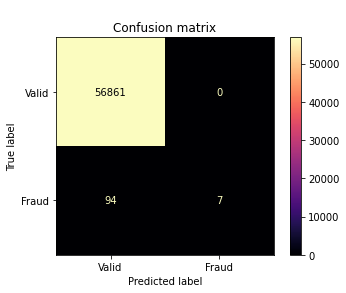

In [18]:
#EVALUATION CRITERIA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix

print("Accuracy score : %.5f" % accuracy_score(y_test,y_hat))

print("\nF1 Score : %.5f" % f1_score(y_test,y_hat))

print("\nPrecision score : %.5f" % precision_score(y_test,y_hat))

print("\nRecall score : %.5f" % recall_score(y_test,y_hat))

pcm = plot_confusion_matrix(knn, X_test, y_test,display_labels = ['Valid','Fraud'], values_format = 'd', cmap = plt.cm.magma)
plt.title('\nConfusion matrix')
plt.show()

### **DECISION TREE**

In [19]:
#BUILD MODEL AND TRAIN THE THE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

des = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4)
des.fit(X_train,y_train)
des

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
#PREDICTION
y_hat = des.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

[0 0 0 0 0]
135406    0
137826    0
70830     0
194993    0
87575     0
Name: Class, dtype: int64


Accuracy score : 0.99947

F1 Score : 0.84536

Precision score : 0.88172

Recall score : 0.81188


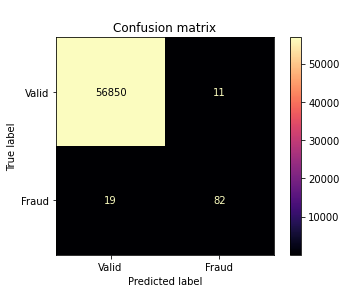

In [21]:
#EVALUATION CRITERIA
print("Accuracy score : %.5f" % accuracy_score(y_test,y_hat))

print("\nF1 Score : %.5f" % f1_score(y_test,y_hat))

print("\nPrecision score : %.5f" % precision_score(y_test,y_hat))

print("\nRecall score : %.5f" % recall_score(y_test,y_hat))

pcm = plot_confusion_matrix(des, X_test, y_test,display_labels = ['Valid','Fraud'], values_format = 'd', cmap = plt.cm.magma)
plt.title('\nConfusion matrix')
plt.show()

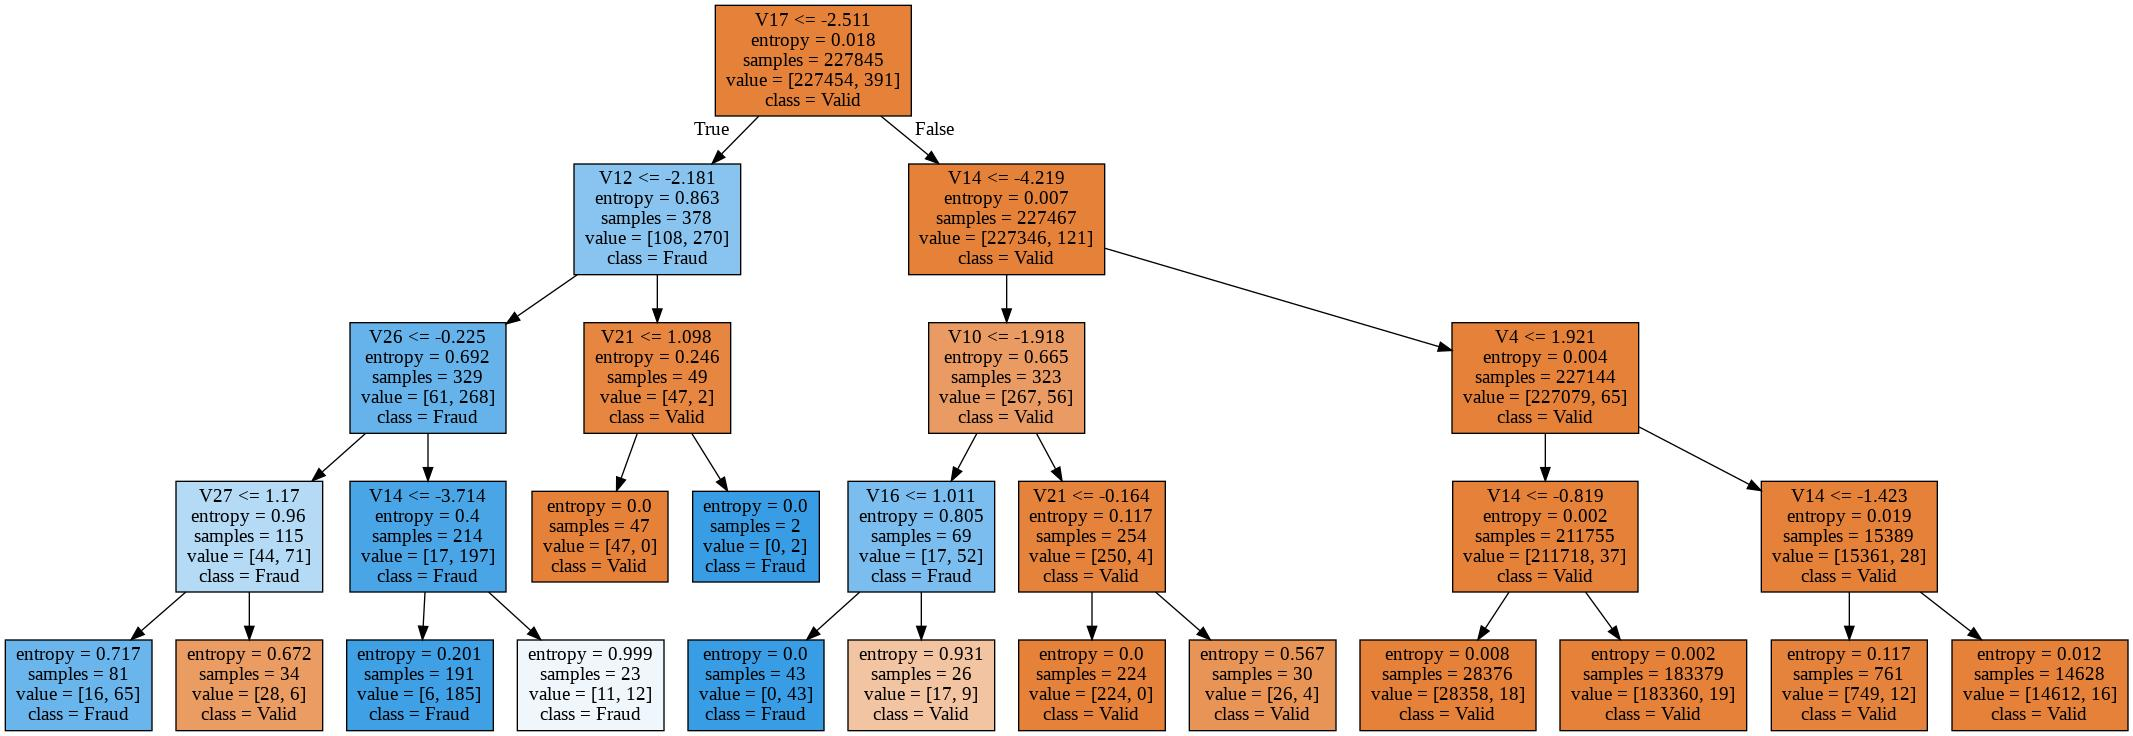

In [22]:
#PLOT THE DECISION TREE
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

fn = df.columns[0:30]
cn = ['Valid','Fraud']

#EXPORT THE TREE INTO ODT FILE
tree.export_graphviz(des, feature_names = fn, class_names = cn, out_file = 'tree.odt', filled = True)

#READ THE CREATED FILE AND CONVERT IT INTO AN IMAGE FILE
graph = pdot.graphviz.graph_from_dot_file('tree.odt')
graph.write_jpg("Tree.png")

#RENDER THE PNG FILE
Image(filename = 'Tree.png')

### **LOGISTIC REGRESSION**

In [23]:
#BUILD MODEL AND TRAIN THE THE CLASSIFIER
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C = 0.01, solver = 'liblinear')
lg.fit(X_train,y_train)
lg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#PREDICTION
y_hat = lg.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

[0 0 0 0 0]
135406    0
137826    0
70830     0
194993    0
87575     0
Name: Class, dtype: int64


Accuracy score : 0.99926

F1 Score : 0.78351

Precision score : 0.81720

Recall score : 0.75248


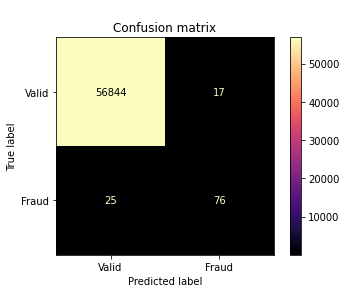

In [25]:
#EVALUATION CRITERIA
print("Accuracy score : %.5f" % accuracy_score(y_test,y_hat))

print("\nF1 Score : %.5f" % f1_score(y_test,y_hat))

print("\nPrecision score : %.5f" % precision_score(y_test,y_hat))

print("\nRecall score : %.5f" % recall_score(y_test,y_hat))

pcm = plot_confusion_matrix(lg, X_test, y_test,display_labels = ['Valid','Fraud'], values_format = 'd', cmap = plt.cm.magma)
plt.title('\nConfusion matrix')
plt.show()

**RANDOM FOREST**

In [26]:
#BUILD MODEL AND TRAIN THE THE CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

rmf = RandomForestClassifier(n_estimators = 100)
rmf.fit(X_train, y_train)
rmf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
#PREDICTION
y_hat = rmf.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

[0 0 0 0 0]
135406    0
137826    0
70830     0
194993    0
87575     0
Name: Class, dtype: int64


Accuracy score : 0.99958

F1 Score : 0.87368

Precision score : 0.93258

Recall score : 0.82178


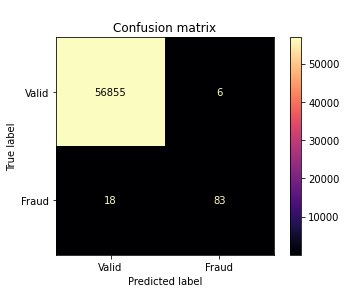

In [28]:
#EVALUATION CRITERIA
print("Accuracy score : %.5f" % accuracy_score(y_test,y_hat))

print("\nF1 Score : %.5f" % f1_score(y_test,y_hat))

print("\nPrecision score : %.5f" % precision_score(y_test,y_hat))

print("\nRecall score : %.5f" % recall_score(y_test,y_hat))

pcm = plot_confusion_matrix(rmf, X_test, y_test,display_labels = ['Valid','Fraud'], values_format = 'd', cmap = plt.cm.magma)
plt.title('\nConfusion matrix')
plt.show()

In [29]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [30]:
#Predicition of a certain row 
rmf.predict([[472.0,	-3.043541,	-3.157307,	1.088463,	2.288644,	1.359805,	-1.064823,	0.325574,	-0.067794,	-0.270953,	-0.838587,	-0.414575,	-0.503141,	0.676502,	-1.692029,	2.000635,	0.666780,	0.599717,	1.725321,	0.283345,	2.102339,	0.661696,	0.435477,	1.375966,	-0.293803,	0.279798,	-0.145362,	-0.252773,	0.035764,	529.00	]])

array([1])

### **SUMMARY**

|    ALGORITHM             |  ACCURACY  |  F1-SCORE  | PRECISION |  RECALL  |
|--------------------------|------------|------------|-----------|----------|
|          KNN             |  0.99835   |  0.12963   |  1.00000  |  0.06931 |  
|     DECISION TREE        |  0.99947   |  0.84536   |  0.88172  |  0.81188 |  
|   LOGISTIC REGRESSION    |  0.99926   |  0.78351   |  0.81720  |  0.75248 |  
|      RANDOM FOREST       |  0.99958   |  0.87368   |  0.93258  |  0.82178 |  


As from the above summary table we can see that **Decision Tree** classifier has a good F1-score, precision and recall score but the **Random forest** classifiers outruns all the above classifier and predicts the fraudalent transaction with more accuracy.  